# ELE435-535 Computational LAB 10

# LAB Parts:

## 1) TensorFlow Installation
## 2) Implementing a multi-layer perceptron with TensorFlow
## 3) Having fun with TensorFlow Playground

### 1) TensorFlow Installation

TensorFlow is a free and an open source software library for numerical computation using data flow graphs. It was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research. However, it's applicable in a
wide variety of other domains as well.

1. Install Anaconda by following the instructions here https://www.anaconda.com/download. This should work for all MAC, Linux and Windows operating systems.
2. Open your Anaconda terminal and create a new environment called tensorflow using the following command: <br> conda create -n tensorflow python=3.6 <br>
3. Now, activate your tensorflow environment by typing <br> source activate tensorflow (MAC and Linux) <br> activate tensorflow (Windows) <br>
4. Once the new envoironment is activated, we are going to install the following packages:<br> conda install ipython <br> conda install jupyter <br> conda install matplotlib <br> conda install -c conda-forge tensorflow 

### 2) Implementing a MLP with TensorFlow

There are many well-written tutorials on how to use TensorFlow. For example, see: https://www.tensorflow.org/guide/low_level_intro <br> https://www.datacamp.com/community/tutorials/tensorflow-tutorial <br>
Further, these days high-level APIs such as Keras has made it very easy to train very deep neural networks. For example, simply with 4-5 lines of code with Keras running on top of TensorFlow (https://www.tensorflow.org/tutorials/), you can get more than 99% test accuracy on MNIST. However, to understand the underlying flow better, we are going to work with the low-level back-end.

Here's a simple code that trains a one layer neural network with linear activation function. We use Cross-entropy as the loss function and SGD for learning the model.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
## Building the graph

num_hidden_neurons=64
learning_rate = 0.1
num_steps = 10000
batch_size = 64

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
weights = {
    'h1': tf.Variable(tf.random_normal([784, num_hidden_neurons])),
    'out': tf.Variable(tf.random_normal([num_hidden_neurons, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([num_hidden_neurons])),
    'out': tf.Variable(tf.random_normal([10]))
}
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(0, num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")

    print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

step 0, training loss= 65.393814, training acc= 17.1875%
step 1000, training loss= 0.099181615, training acc= 95.3125%
step 2000, training loss= 0.69918907, training acc= 92.1875%
step 3000, training loss= 0.0618574, training acc= 98.4375%
step 4000, training loss= 0.32768267, training acc= 96.875%
step 5000, training loss= 0.092950374, training acc= 96.875%
step 6000, training loss= 0.5601745, training acc= 93.75%
step 7000, training loss= 0.30464762, training acc= 95.3125%
step 8000, training loss= 0.094346195, training acc= 95.3125%
step 9000, training loss= 0.041880958, training acc= 100.0%
Test acc= 88.31 %


1) Increase the number of neurons in the hidden layer to 128, 256, 512 and 1024. Plot the training loss and test accuracy vs the number of neurons (in two separate plots).

step 0, training loss= 73.73592, training acc= 23.4375%
step 1000, training loss= 0.19793873, training acc= 93.75%
step 2000, training loss= 0.037162513, training acc= 98.4375%
step 3000, training loss= 0.47285286, training acc= 90.625%
step 4000, training loss= 0.20240417, training acc= 93.75%
step 5000, training loss= 0.054046445, training acc= 98.4375%
step 6000, training loss= 0.028095331, training acc= 98.4375%
step 7000, training loss= 0.08285137, training acc= 96.875%
step 8000, training loss= 0.1680573, training acc= 95.3125%
step 9000, training loss= 0.051575698, training acc= 98.4375%
Test acc= 88.65 %
step 0, training loss= 94.53021, training acc= 23.4375%
step 1000, training loss= 0.28732166, training acc= 98.4375%
step 2000, training loss= 0.07500735, training acc= 96.875%
step 3000, training loss= 0.19524021, training acc= 96.875%
step 4000, training loss= 0.13347794, training acc= 96.875%
step 5000, training loss= 0.17387928, training acc= 96.875%
step 6000, training los

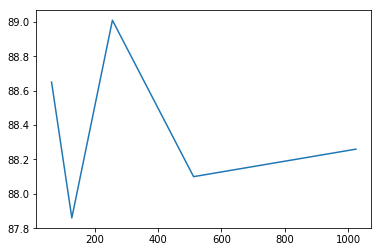

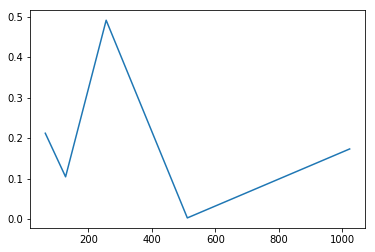

In [4]:
num_neurons = [2**x for x in range(6,11)]
accuracies = []
training_losses = []

with tf.Session() as sess:

    for n in num_neurons:
        num_hidden_neurons = n

        weights = {
            'h1': tf.Variable(tf.random_normal([784, num_hidden_neurons])),
            'out': tf.Variable(tf.random_normal([num_hidden_neurons, 10]))
        }
        biases = {
            'b1': tf.Variable(tf.random_normal([num_hidden_neurons])),
            'out': tf.Variable(tf.random_normal([10]))
        }
        
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        
        sess.run(tf.global_variables_initializer())

        for step in range(0, num_steps):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 1000 == 0:
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")

        print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")
        accuracies.append(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))
        training_losses.append(sess.run(loss, feed_dict={X: batch_x,Y: batch_y}))
        
plt.figure()
plt.plot(num_neurons, accuracies)
plt.show()

plt.figure()
plt.plot(num_neurons, training_losses)
plt.show()

2) Inspired by the code above, train a MLP with 3 layers, the first layer with 64, the second layer with 128 and the final hidden layer with 256 neurons, respectively. Report the training and test accuracies.

In [5]:
learning_rate = 0.0001

weights = {
    'h1': tf.Variable(tf.random_normal([784, 64])),
    'h2': tf.Variable(tf.random_normal([64, 128])),
    'h3': tf.Variable(tf.random_normal([128, 256])),
    'out': tf.Variable(tf.random_normal([256, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([64])),
    'b2': tf.Variable(tf.random_normal([128])),
    'b3': tf.Variable(tf.random_normal([256])),
    'out': tf.Variable(tf.random_normal([10]))
}

def neural_net_3(x):
    layer_1 = tf.matmul(x, weights['h1']) + biases['b1']
    layer_2 = tf.matmul(layer_1, weights['h2']) + biases['b2']
    layer_3 = tf.matmul(layer_2, weights['h3']) + biases['b3']
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net_3(X), labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net_3(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(0, num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")

    print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")

step 0, training loss= 21195.762, training acc= 7.8125%
step 1000, training loss= 173.42236, training acc= 90.625%
step 2000, training loss= 88.10405, training acc= 90.625%
step 3000, training loss= 43.800327, training acc= 90.625%
step 4000, training loss= 40.51535, training acc= 90.625%
step 5000, training loss= 20.963165, training acc= 90.625%
step 6000, training loss= 55.99587, training acc= 87.5%
step 7000, training loss= 24.719666, training acc= 95.3125%
step 8000, training loss= 35.219337, training acc= 89.0625%
step 9000, training loss= 21.841433, training acc= 92.1875%
Test acc= 82.36 %


3) Plot the training / test accuracy for when learning rate is {100, 10, 1, 0.1, 0.01, and 0.001}. Interpret the results.

step 0, training loss= 15819.5625, training acc= 45.3125%
step 1000, training loss= 33.42576, training acc= 96.875%
step 2000, training loss= 58.498867, training acc= 95.3125%
step 3000, training loss= 71.36689, training acc= 92.1875%
step 4000, training loss= 11.017002, training acc= 90.625%
step 5000, training loss= 14.1893215, training acc= 95.3125%
step 6000, training loss= 4.0648904, training acc= 96.875%
step 7000, training loss= 1.387703, training acc= 98.4375%
step 8000, training loss= 14.730422, training acc= 95.3125%
step 9000, training loss= 9.312147, training acc= 98.4375%
Test acc= 86.159996 %
step 0, training loss= 771866.1, training acc= 6.25%
step 1000, training loss= nan, training acc= 10.9375%
step 2000, training loss= nan, training acc= 6.25%
step 3000, training loss= nan, training acc= 12.5%
step 4000, training loss= nan, training acc= 4.6875%
step 5000, training loss= nan, training acc= 15.625%
step 6000, training loss= nan, training acc= 4.6875%
step 7000, trainin

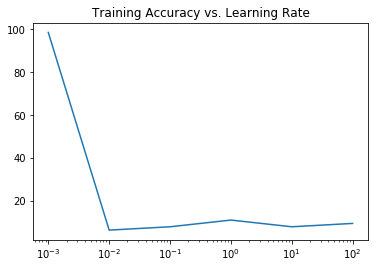

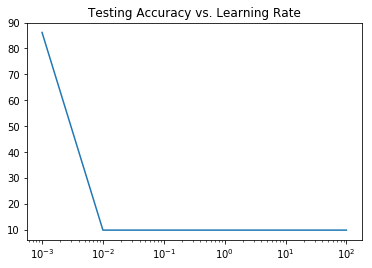

When the learning rates are too, the values in the layers get too large and the derivatives unstable and so no learning is done. When the learning rate is small enough, the backpropagation is small enough that learning occurs.


In [6]:
rates = [10**x for x in range(-3,3)]
training_accuracies = []
testing_accuracies = []

with tf.Session() as sess:

    for rate in rates:

        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net_3(X), labels=Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=rate)
        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net_3(X), 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        sess.run(tf.global_variables_initializer())

        for step in range(0, num_steps):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 1000 == 0:
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")

        print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")

        training_accuracies.append(train_acc*100)
        testing_accuracies.append(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))
        
plt.figure()
plt.title('Training Accuracy vs. Learning Rate')
plt.plot(rates, training_accuracies)
plt.xscale('log')
plt.show()

plt.figure()
plt.title('Testing Accuracy vs. Learning Rate')
plt.plot(rates, testing_accuracies)
plt.xscale('log')
plt.show()

print('When the learning rates are too, the values in the layers get too large and the derivatives unstable and so no learning is done. When the learning rate is small enough, the backpropagation is small enough that learning occurs.')

### 3) Having fun with TensorFlow Playground:

Please visit the following link:
    http://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=regplane&learningRate=1&regularizationRate=0&noise=0&networkShape=&seed=0.93547&showTestData=false&discretize=false&percTrainData=50&x=true&y=false&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
        

#### For the Circle DATASET:
1) Pick the number of hidden layers to be zero. Set the learning rate to be 0.01. Leave all other parameters to their default values. Now, based on the distribution of data, can one single feature out of the available options classify all training data correctly? If so, explain which one and why? If you are only allowed to hand-pick one feature, which one would you pick?

**Answer**: One feature cannot classify all the data correctly because circles are parameterized by X_1^2 + X_2^2 < r^2 and so one needs at least two features to classify the data. Based on the data, one single feature cannot classify the data. If I was only allowed to pick one feature from the list it would either be X_1^2 or X_2^2. If I could craft one outside the list, it would be X_1^2 + X_2^2.

2) Now, select only the feature x1 (no other features should be selected). Set the learning rate to be 0.01 and train the network. Report the training and test loss? Repeat this for learning rate of 0.03, 0.1, 0.3, 1, 3 and 10, respectively, and explain what happens as you increase the learning rate.

|Learning Rate|Training Loss|Testing Loss|
|-------------|-------------|------------|
|0.01|0.499|0.499|
|0.03|0.499|0.498|
|0.1|0.503|0.500|
|0.3|0.574|0.548|
|1|0.713|0.640|
|3|0.737|0.655|
|10|0.736|0.677|

3) Pick only x1 feature. Now, add one hidden layer with two neurons. Set the learning rate to be 0.1 and Activation to be "ReLU". Train the network. What training/test loss can you achieve? Repeat this for "Tanh", "Sigmoid" and "Linear". Which activation performs the best? Which one performs the worst? why?

|Activation|Training Loss|Testing Loss|
|-------------|-------------|------------|
|ReLU|0.268|0.262|
|Tanh|0.265|0.256|
|Sigmoid|0.266|0.255|
|Linear|0.499|0.500|

4) Now, pick the activation to be "sigmoid" and train your network for more than 600 epochs. Report the final values of weights in the network. Then, pick the regularization to be "L2". Set the regularization rate to be "0.1". How does the training/test loss change? How about the final value of the learned weights? Repeat the same thing for "L1" regularizer and explain how the weights, training and test loss change.

|Regularization|Training Loss|Testing Loss|Weights|
|-------------|-------------|------------|--------|
|None|0.266|0.256|Weights are 1 and 2 in first layer then 3.6 and -3.5 in second layer|
|L2|0.501|0.500|Weights are very close to 0|
|L1|0.501|0.500|Weights are 0|

5) Pick only "x1" feature and set the activation to be "sigmoid". Set the "Regularization" to be "None". Now, increase the number of neurons in your hidden layer from 2 to 8. Does increasing the number of parameters (e.g., having more neurons) help with generalization? If so, how much improvement can you acheive?

**Answer**: With 8 neurons, the testing accuracy is 0.256 and training accuracy is 0.265. This does not improve generalization (testing accuracy) as compared to before.

6) Now, increase the number of hidden layers to two, each with 8 neurons. Report the training/test loss after convergence. Does this help with generalization?

**Answer**: After convergence, the testing accuracy is 0.256 and training accuracy is 0.265. This is exactly the same as we saw before.

7) Now you are free to choose any training setup you want (e.g., the network width and depth, learning rate, activation function, regularization, etc.) but your network cannot have more than 6 weights in total. Construct a network that can achieve 0 training loss. Explain your setup and copy the url of the network you constructed (just copy-past the url of web-page you are at).

https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.1&noise=0&networkShape=1&seed=0.56492&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**Answer**: The setup is simple, it requires X_1^2 and X_2^2 as features (as described before) with one hidden layer with one node with a ReLU activation to add some non linearity. It has a total of 3 weights and 1 bias.

#### For XOR, Gaussian and Spiral Datasets:


8) Repeat part 7 for the XOR dataset when the total number of weights is less than or equal to 4.

https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.1&noise=0&networkShape=1&seed=0.77619&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**Answer**: The setup is simple, it requires X_1*X_2 as a feature (as described before) with one hidden layer with one node with a ReLU activation to add some non linearity. It has a total of 2 weights and 1 bias.

9) Repeat part 7 for the Gaussian dataset when the total number of weights is less than or equal to 2.

https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.1&noise=0&networkShape=&seed=0.37141&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**Answer**: The setup requires no hidden layers and the features X_1 and X_2 because the data is linearly seperable. This requires a total of 2 weights and 0 biases.

10) Repeat part 7 for the Spiral dataset when the total number of weights is less than or equal to 48. Any training loss less than 0.005 is accepted.

https://playground.tensorflow.org/#activation=tanh&batchSize=15&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.1&noise=0&networkShape=8&seed=0.90322&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**Answer**: The setup is to use Tanh for activation. For the features, use X_1, X_2, X_1^2, and X_2^2. Then use one hidden layer with 8 nodes. This yields 4*8+8=40 weights and 8 biases. Use learning rate of 0.1. The training loss is 0.003.